In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston 


In [74]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
LinReg.score(X_test, y_test)

0.7059096071098043

In [56]:
LinReg.coef_

array([-1.53004848e-01,  4.79388437e-02, -8.60131597e-03,  2.57986675e+00,
       -1.46325645e+01,  3.96283436e+00, -7.92357629e-03, -1.46078023e+00,
        3.45431204e-01, -1.24503134e-02, -9.19092768e-01,  1.32203623e-02,
       -5.17255347e-01])

In [57]:
LinReg.intercept_

32.21412038974388

In [58]:
RidgeReg = Ridge(alpha = 100)
RidgeReg.fit(X_train, y_train)
RidgeReg.score(X_test, y_test)

0.6722440959863465

In [59]:
RidgeReg.coef_

array([-1.38680076e-01,  5.61543599e-02, -6.12857751e-02,  4.45446747e-01,
       -1.39970089e-01,  2.06041710e+00,  1.00636451e-03, -1.11040278e+00,
        3.67305516e-01, -1.61865154e-02, -8.59701458e-01,  1.18068696e-02,
       -6.84868637e-01])

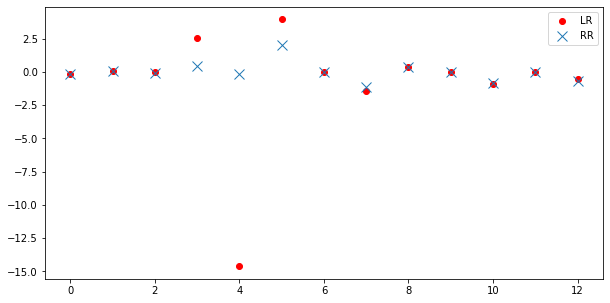

In [60]:
plt.figure(figsize = (10,5))
plt.plot(LinReg.coef_, ls = 'none', marker = 'o', color = 'red', label = 'LR')
plt.plot(RidgeReg.coef_, linestyle = 'none', marker = 'x', ms = 10, label = 'RR')
plt.legend();

In [61]:
# Lasso Regression

LassoReg = Lasso(alpha = 10)
LassoReg.fit(X_train, y_train)
LassoReg.score(X_test, y_test)

0.5091996167677835

In [62]:
np.sum(LassoReg.coef_ != 0)

4

In [63]:
LassoReg.coef_

array([-0.        ,  0.0325868 , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00879476,
       -0.        ,  0.00753758, -0.5773086 ])

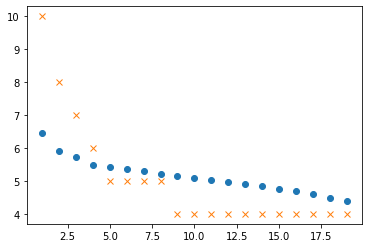

In [73]:
Scores = []
Coefficients_notzero = []

for i in range(1,20):
    LassoReg = Lasso(alpha = i)
    LassoReg.fit(X_train, y_train)
    Scores.append(10*LassoReg.score(X_test, y_test))
    Coefficients_notzero.append(np.sum(LassoReg.coef_ != 0))
    
plt.plot(range(1,20), Scores, ls = 'none', marker = 'o')   
plt.plot(range(1,20), Coefficients_notzero, ls = 'none', marker = 'x'); 